---
### Projectr : 하루시작 데이터 품질 신뢰성 판단.
### Description : 
    
### Author : Forrest Dpark
### Date : 2024.06.9 ~
### Detail : 
### Update: 
    * 2024.06.09 by pdg : 지하철역 전체에대해서 서비스 가능한지 맞지않는 숫자들에 대한 해석
        - 지하철 승하차 데이터에서뽑은 역코드 개수와 지하철 배차표 데이터에서 뽑은 역 코드 개수가 서로 다르다. 
        - 지하철 배차표에있는 데이터가 신뢰성이있다. (군자역 관련 인터넷 비교)
        - 지하철 배차표에 있는 실제존재 역 가운데 승하차 데이터에 없는 역사코드는 서비스 불가 역으로 정리해주는 함수를 만듬. 
        - 2022 년 데이터를 기준으로 함수를 만들었기때문에 2023, 24년 데이터 에서는 불일치할 가능성이 있음 
        - 배차표 테이블 지환씨 주피터 보고 참고하여 함수화하고 각 호선별 배차표 데이터 넣었을때 자동으로 배차표 테이블이
         머신러닝하기위한 포맷으로 정제되어 csv 파일로 정제하게 함. 
        - 배차표에 호선 칼럼 추가함. 
    * 20234.06.12 by pdg : 군자역 검색이슈
        - 여전히 환승역구간에서 모델 예측이 안되는 이슈가 있다. 
        - 특히 7호선 라인은 맨마지막 구간이기때문에 역코드가 뒤로 밀려있는 상황
        - 이것을 어떻게 해결해야할 것인가????? <-머신러닝 학습데이터에서 군자역으로 코드검색한뒤 예측 되는거 테스트 먼저 해야함. 
---

In [1]:
#### Jupyter Basic Setting ####
import pandas as pd,numpy as np
import matplotlib.pyplot as plt,seaborn as sns  # 시각화
import warnings; warnings.filterwarnings('ignore')  # 경고 무시
import sys,os 
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
from Module.Functions import Service
# 기본 세팅
Service.plotSetting("seaborn-v0_8")


___ 🟡 PLOTSETTING. 
___ 📌 matplotlibn plot 한글화 Setting
___## OS platform 한글 세팅완료 ## ___


In [2]:
#7 호선 군자역에는 몇개의 역이 있는가? 
# 일단 station info 파일 
import pandas as pd , numpy as np
####  승하차 인원 데이터가 있는 역들의 역사 정보 
station= pd.read_csv('../Data/StationInfo.csv')
#### 배차시간 데이터
subway_dispatch = pd.read_csv("../Data/지하철배차시간데이터/서울교통공사_서울 도시철도 열차운행시각표_20240305.csv", encoding='euc-kr')
#서울교통공사_서울 도시철도 열차운행시각표_20240305.csv

In [3]:
station.head() # col : 역사코드	역명	호선	환승역수

역사코드  역이름  호선  환승역수
0   150  서울역   1     2
1   426  서울역   4     2
2   151   시청   1     2
3   201   시청   2     2
4   152   종각   1     1

In [4]:
subway_dispatch.head() # 고유번호,호선,역사코드,역사명,주중주말,방향,급행여부,열차코드,열차도착시간,열차출발시간,출발역,도착역

고유번호  호선   역사코드 역사명 주중주말  방향  급행여부  열차코드 열차도착시간    열차출발시간 출발역 도착역
0     1   2  211.0  성수  DAY  IN     0  2022    NaN  05:30:00  성수  성수
1     2   2  211.0  성수  DAY  IN     0  2026    NaN  05:40:00  성수  성수
2     3   2  211.0  성수  DAY  IN     0  2028    NaN  05:47:00  성수  성수
3     4   2  211.0  성수  DAY  IN     0  2030    NaN  05:54:00  성수  성수
4     5   2  211.0  성수  DAY  IN     0  2032    NaN  05:58:00  성수  성수

In [6]:

line7= station[station['호선']==7]
line7.reset_index(drop=True)
stations = line7['역이름'].unique()
stations

array(['건대입구', '대림', '고속터미널', '노원', '군자', '태릉입구', '장암', '도봉산', '수락산',
       '마들', '중계', '하계', '공릉', '먹골', '중화', '상봉', '면목', '사가정', '용마산', '중곡',
       '어린이대공원', '뚝섬유원지', '청담', '강남구청', '학동', '논현', '반포', '내방', '이수',
       '남성', '숭실대입구', '상도', '장승배기', '신대방삼거리', '보라매', '신풍', '남구로',
       '가산디지털단지', '철산', '광명사거리', '천왕', '온수', '상동', '부평구청', '까치울', '부천시청'],
      dtype=object)

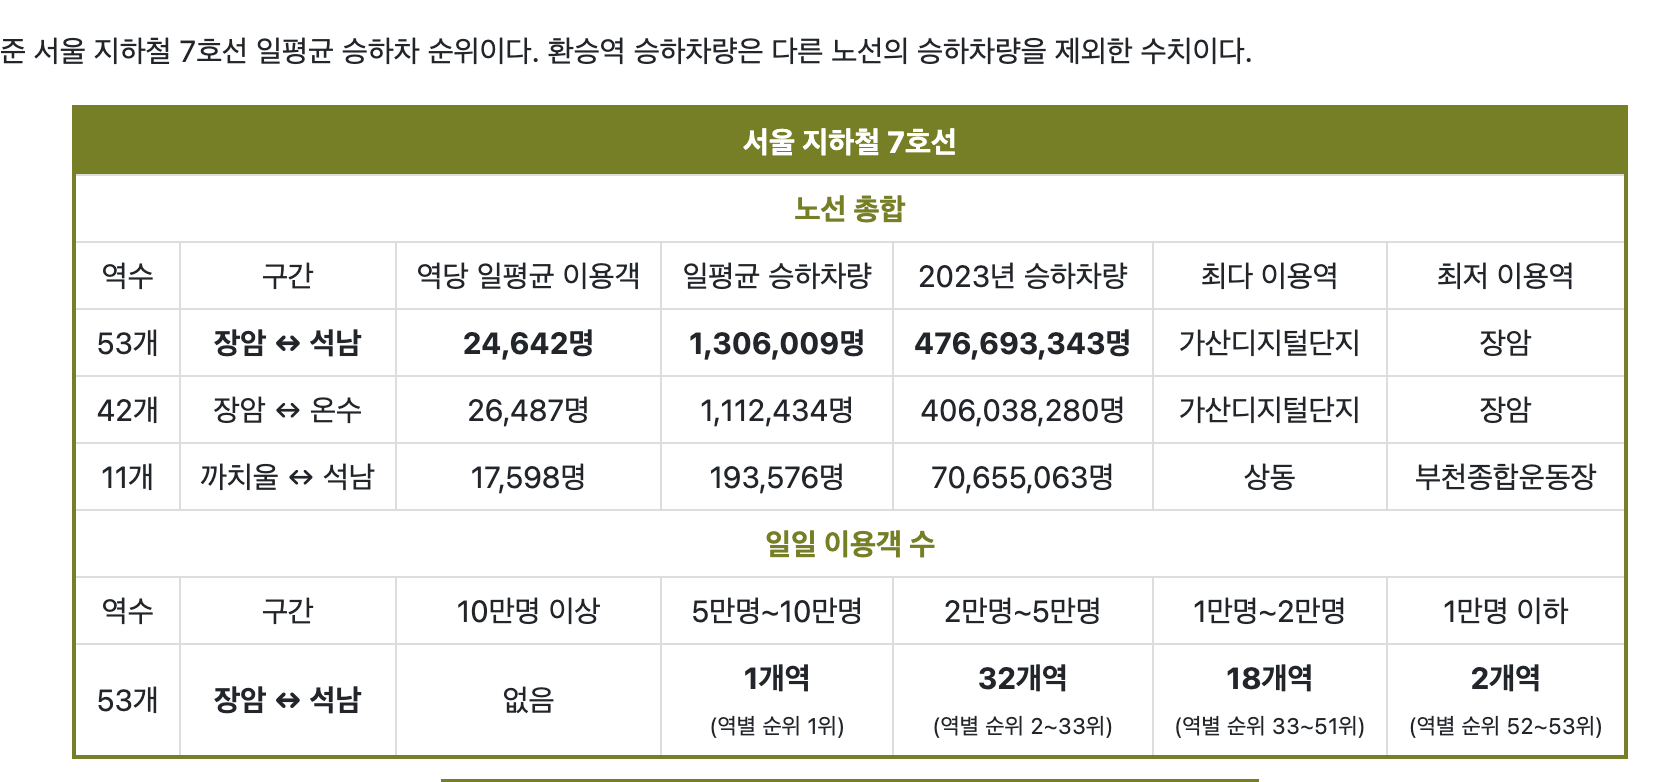

> 이걸보면 42개든지 53개든지 둘중하나여야하는데 왜 46개가 나온단 말인가?

데이터를 보면 까치울이 포함되어있는것을 알수있다. 11개의 역에 대해서 조사해보자

In [ ]:
for i in range(1,8):
    _ = Service.호선당서비스불가역이름추출(i,station, subway_dispatch)

⬇--2호선 서비스불가 역사코드 . 및 역사명--⬇
 1.200 까치산 역
--------------------
⬇--3호선 서비스불가 역사코드 . 및 역사명--⬇
 1.1958 대화 역
 2.1957 주엽 역
 3.1956 정발산 역
 4.1955 마두 역
 5.1954 백석 역
 6.1953 대곡 역
 7.1952 화정 역
 8.1951 원당 역
 9.1948 원흥 역
 10.1950 삼송 역
--------------------
⬇--4호선 서비스불가 역사코드 . 및 역사명--⬇
 1.1450 선바위 역
 2.1451 경마공원 역
 3.1452 대공원 역
 4.1453 과천 역
 5.1454 정부과천청사 역
 6.1455 인덕원 역
 7.1456 평촌 역
 8.1457 범계 역
 9.1458 금정 역
 10.1751 산본 역
 11.1763 수리산 역
 12.1752 대야미 역
 13.1753 반월 역
 14.1754 상록수 역
 15.1755 한대앞 역
 16.1756 중앙 역
 17.1757 고잔 역
 18.1758 초지 역
 19.1759 안산 역
 20.1760 신길온천 역
 21.1761 정왕 역
 22.1762 오이도 역
--------------------
⬇--7호선 서비스불가 역사코드 . 및 역사명--⬇
 1.3763 석남 역
 2.3762 산곡 역
 3.2760 굴포천 역
 4.2759 삼산체육관 역
 5.2756 신중동 역
 6.2755 춘의 역
 7.2754 부천종합운동장 역
--------------------


In [ ]:
print("배차 시간 제공 역 개수: ",len(subway_dispatch['역사명'].unique())) # 총 394개의 역에대한 배차 시간데이터가 있다. 
np.sort(subway_dispatch['호선'].unique()) #1, 2, 3, 4, 5, 6, 7, 8, 9  -> 9호선 데이터 까지 있음

배차 시간 제공 역 개수:  394


array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
## line 별로 테이블을 따로 만든다, 
# line1_배치= subway_dispatch[subway_dispatch['호선']==1]

line_배치_dict = {}

for i in range(1,9):
    line_배치_dict[f"{i}호선"] =subway_dispatch[subway_dispatch['호선']==i]
    

In [ ]:
line_배치_dict['8호선'].head()


고유번호  호선    역사코드 역사명 주중주말  방향  급행여부  열차코드 열차도착시간    열차출발시간 출발역 도착역
146941  146942   8  2827.0  모란  DAY  UP     0  8006    NaN  05:30:00  모란  암사
146942  146943   8  2827.0  모란  DAY  UP     0  8008    NaN  05:40:00  모란  암사
146943  146944   8  2827.0  모란  DAY  UP     0  8010    NaN  05:50:00  모란  암사
146944  146945   8  2827.0  모란  DAY  UP     0  8012    NaN  06:00:00  모란  암사
146945  146946   8  2827.0  모란  DAY  UP     0  8014    NaN  06:09:00  모란  암사

In [ ]:
def dispatch_table_forML(line_배치):
        """
        # Description : 특정 호선에대한 배치표 정보를 받아서 pivotable 로시간대별 칼럼생성후 배차 수를 계산
        # Date : 2024.06.09
        # Author : Forrest Dpark
        # Detail:
            * line_배치 (df)
            * Returns: pivotable for machine learning (df)
        """
        import warnings ; warnings.filterwarnings('ignore')
        # 새로운 테이블 만들기
        line_배치['열차시간계산']=line_배치['열차도착시간'].str.split(':').str[0]
        # '역사명'과 '시간'이 같은 데이터 그룹화
        grouped = line_배치.groupby(['역사코드', '열차시간계산','주중주말','방향'])
        # 각 그룹의 크기(개수) 계산
        count = grouped.size().rename('차량수')
        # 결과를 DataFrame으로 변환
        interval = count.reset_index()
        # return interval['역사코드'].unique()
        # 열 이름 지정
        interval.columns = ['역사코드', '시간', '주중주말','방향','배차수']
        interval['역사코드'] = interval['역사코드'].astype('int64')
        # 역사코드(=),주중주말(=)을 기준으로 방향이 다른 배차수를 합친 후 새로운 로우 생성후 방향 컬럼 삭제한 새로운 데이터 셋 만들기
        # 방향 별로 배차수 합치기
        
        interval = interval.groupby(['역사코드', '시간', '주중주말'])['배차수'].sum().reset_index()
        interval['배차수']=interval['배차수']/2
        
        # 피벗 테이블 생성
        pivot_df = interval.pivot_table(index=['역사코드', '주중주말'], columns='시간', values='배차수', aggfunc='mean')

        # # 인덱스를 열로 리셋
        interval = pivot_df.reset_index()
        # return interval
        # # 첫 번째 인덱스 열을 추가하여 새로운 데이터프레임 생성
        # interval['역사코드2'] = interval['호선']
        # interval.drop(columns=['역사코드2'],inplace=True)
        # interval.index = interval['역사코드']
        interval.fillna(0, inplace=True)
        cols = interval.columns.tolist()
        cols.append(cols.pop(cols.index('00')))
        interval = interval[cols]

        interval.rename(columns={'00': '24'}, inplace=True)
        interval['호선']=line_배치['호선'].unique()[0] 
        interval=Service.reorder_columns(col_name='호선',df=interval,target_idx=1)
        print(Service.colored_text(line_배치['호선'].unique() , "호선 에 대한 배차 테이블 표정제 결과"),'blue')
        return interval
dispatch_table_forML(line_배치_dict['7호선'])

[7] 호선 에 대한 배차 테이블 표정제 결과


시간   역사코드  호선 주중주말   05   06    07    08    09    10    11  ...    15    16  \
0    2711   7  DAY  0.5  2.5   2.5   3.0   2.5   2.5   2.5  ...   2.5   2.5   
1    2711   7  SAT  0.5  2.0   1.5   2.0   1.5   2.0   2.0  ...   1.5   1.5   
2    2712   7  DAY  2.5  7.5  14.0  15.5  14.5  12.0  10.0  ...  10.0  10.0   
3    2712   7  SAT  2.5  6.5   9.0   9.5  10.0  10.0  10.0  ...  10.0  10.0   
4    2713   7  DAY  3.0  7.5  13.5  15.5  15.5  12.0  10.0  ...  10.0  10.0   
..    ...  ..  ...  ...  ...   ...   ...   ...   ...   ...  ...   ...   ...   
101  2761   7  SAT  2.0  5.5   5.5   5.0   5.0   5.0   5.0  ...   5.0   5.0   
102  3762   7  DAY  2.5  6.0   8.0  10.0   8.0   6.0   5.0  ...   5.0   5.5   
103  3762   7  SAT  2.0  5.5   5.5   5.0   5.0   5.0   5.0  ...   5.0   5.0   
104  3763   7  DAY  1.0  2.5   4.5   4.5   4.5   3.0   2.5  ...   2.5   2.5   
105  3763   7  SAT  0.5  2.5   3.0   2.5   2.5   2.5   2.5  ...   2.5   2.5   

시간     17    18    19    20    21   22   23   24  
0     2.0   3.0   2.5   2.5   2.0  1.0  1.5  0.0  
1     2.0   2.5   1.5   2.0   2.0  1.5  2.0  0.0  
2    12.5  14.5  13.0  12.0  10.0  8.0  6.0  1.0  
3    10.0  10.0  10.0  10.0   9.0  8.0  5.0  1.0  
4    12.0  14.0  14.0  12.0   9.0  8.5  6.5  0.5  
..    ...   ...   ...   ...   ...  ...  ...  ...  
101   5.0   5.0   5.0   4.5   6.0  5.5  4.5  0.5  
102   5.0   8.5   7.5   5.5   5.0  4.0  4.5  0.5  
103   5.0   5.0   5.0   5.0   5.5  5.5  4.5  0.5  
104   2.5   4.0   4.0   3.0   2.5  2.0  2.0  0.5  
105   2.5   2.5   2.5   2.5   3.0  3.0  2.0  0.5  

[106 rows x 23 columns]

In [ ]:
# 배차 파일 저장 
for key in line_배치_dict.keys():
    file = dispatch_table_forML(line_배치_dict[key])
    file.to_csv(f'../Data/지하철배차시간데이터/{key}배차.csv',index =None)

[1] 호선 에 대한 배차 테이블 표정제 결과
[2] 호선 에 대한 배차 테이블 표정제 결과
[3] 호선 에 대한 배차 테이블 표정제 결과
[4] 호선 에 대한 배차 테이블 표정제 결과
[5] 호선 에 대한 배차 테이블 표정제 결과
[6] 호선 에 대한 배차 테이블 표정제 결과
[7] 호선 에 대한 배차 테이블 표정제 결과
[8] 호선 에 대한 배차 테이블 표정제 결과
